# Result Plots

Plots using 30 runs csv files of base learners and stacking.

In [1]:
# import libraries
import warnings

warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Load Data

In [2]:
# load base learners (with best params)
lra_df = pd.read_csv("./results/lra.csv")
dtc_df = pd.read_csv("./results/lra.csv")
ann_df = pd.read_csv("./results/ann.csv")
svc_df = pd.read_csv("./results/svc.csv")

# load base learners (with best params + refit data)
refit_lra_df = pd.read_csv("./results/refit_lra.csv")
refit_dtc_df = pd.read_csv("./results/refit_lra.csv")
refit_ann_df = pd.read_csv("./results/refit_ann.csv")
refit_svc_df = pd.read_csv("./results/refit_svc.csv")

# load base learners (with best params + corr data)
corr_lra_df = pd.read_csv("./results/corr_lra.csv")
corr_dtc_df = pd.read_csv("./results/corr_lra.csv")
corr_ann_df = pd.read_csv("./results/corr_ann.csv")
corr_svc_df = pd.read_csv("./results/corr_svc.csv")

In [3]:
def create_df(dfs_dict, metric):
    """Create dataframe with only `metric` columns."""
    col_dict = {}
    for label, df in dfs_dict.items():
        col_dict[label] = df[metric]
    return pd.DataFrame(col_dict)

In [4]:
def pd_boxplot(df, metric, title, save=False):
    """Plot boxplot of the dataframe."""
    df.boxplot(rot=45)
    plt.title(title, fontsize=14)
    plt.ylabel(metric, fontsize=12)
    if save: 
        plt.savefig(f'figures/{title}.png')

In [5]:
def plot_BCA_mAUC(dfs_dict, title, save=False):
    """Plot routine for BCA and mAUC."""
    BCA_df = create_df(dfs_dict, 'BCA_test')
    mAUC_df = create_df(dfs_dict, 'mAUC_test')
    plt.figure(figsize=(16,9))
    plt.subplot(1,2,1)
    pd_boxplot(BCA_df, 'BCA', f'{title} (BCA)', save=save)
    plt.subplot(1,2,2)
    pd_boxplot(mAUC_df, 'mAUC', f'{title} (mAUC)', save=save)
    plt.tight_layout()
    plt.show()

## Plots
### LRA

In [6]:
lra_dict = {
    'LRA': lra_df,
    'LRA (Corr)' : corr_lra_df,
    'LRA (Refit)' : refit_lra_df
}

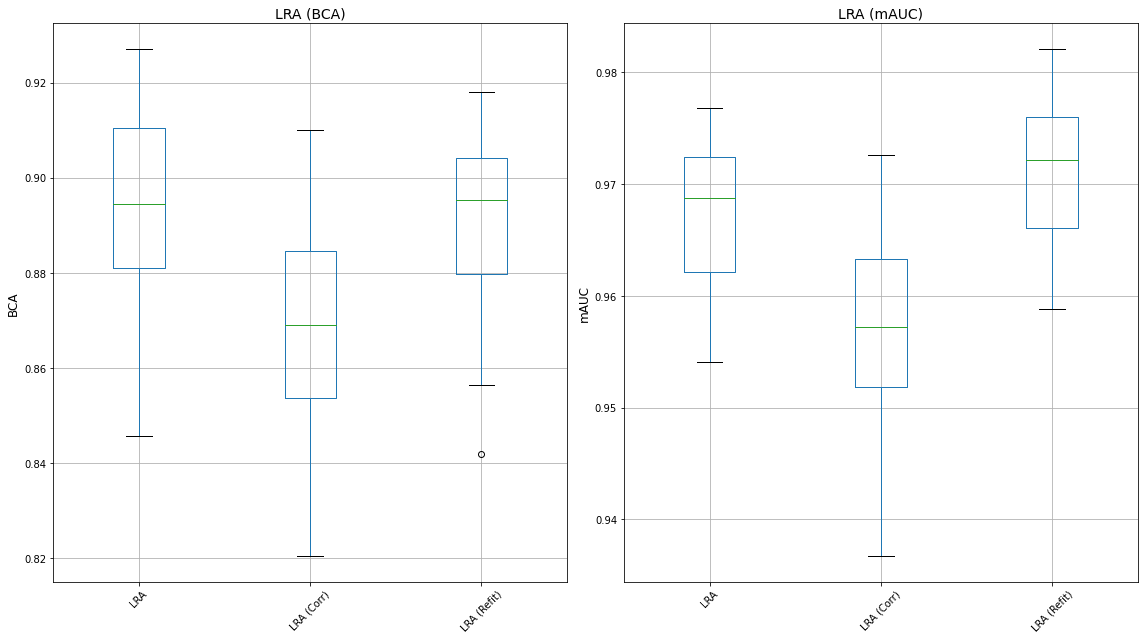

In [7]:
plot_BCA_mAUC(lra_dict, 'LRA')

### DTC

In [8]:
dtc_dict = {
    'DTC': dtc_df,
    'DTC (Corr)' : corr_dtc_df,
    'DTC (Refit)' : refit_dtc_df
}

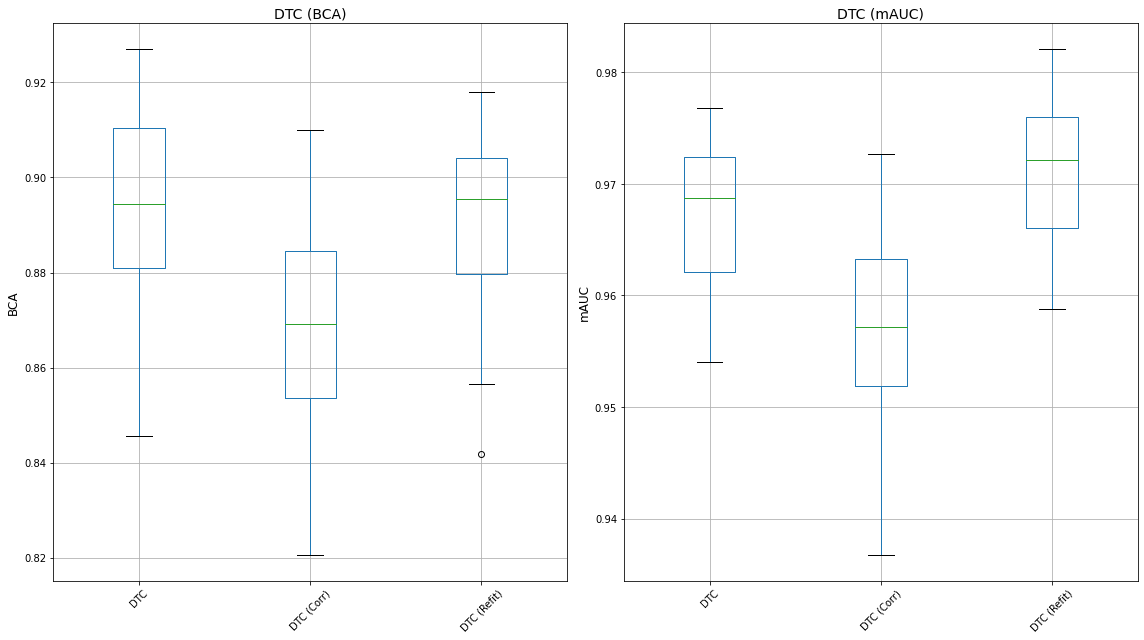

In [9]:
plot_BCA_mAUC(dtc_dict, 'DTC')

### ANN

In [10]:
ann_dict = {
    'ANN': ann_df,
    'ANN (Corr)' : corr_ann_df,
    'ANN (Refit)' : refit_ann_df
}

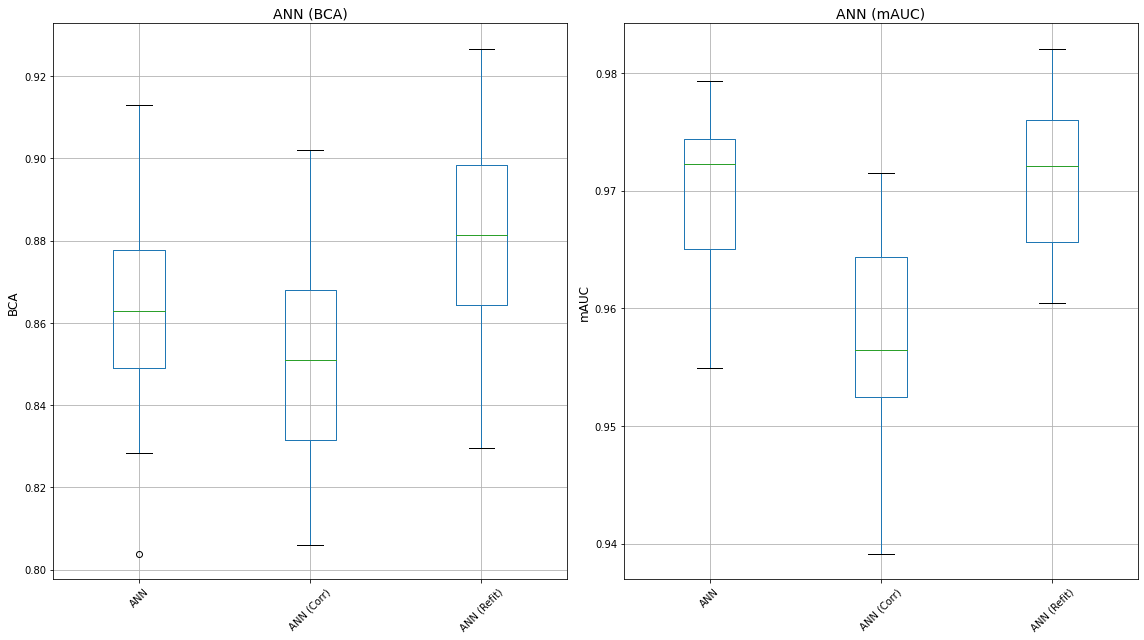

In [11]:
plot_BCA_mAUC(ann_dict, 'ANN')

### SVC

In [12]:
svc_dict = {
    'SVC': svc_df,
    'SVC (Corr)' : corr_svc_df,
    'SVC (Refit)' : refit_svc_df
}

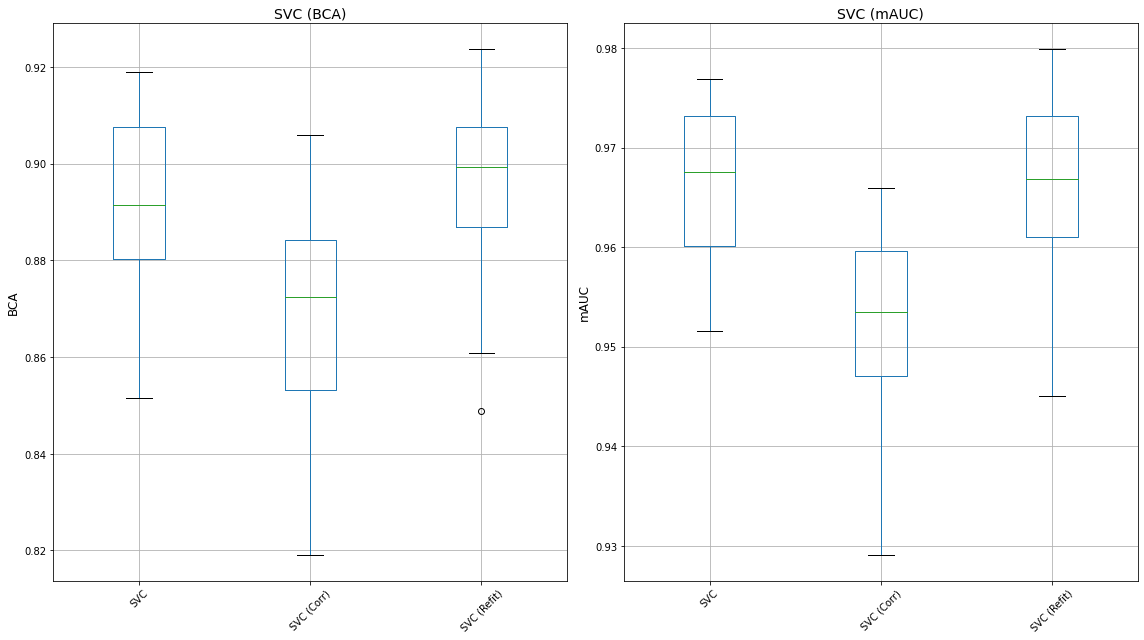

In [13]:
plot_BCA_mAUC(svc_dict, 'SVC')

### Remarks
`Refit` data performs better than `Corr` data for all base learners.